In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer

How to get synonyms/antonyms from NLTK WordNet in Python?

WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.

WordNet’s structure makes it a useful tool for computational linguistics and natural language processing.

First, WordNet interlinks not just word forms—strings of letters—but specific senses of words. As a result, words that are found in close proximity to one another in the network are semantically disambiguated.

Second, WordNet labels the semantic relations among words, whereas the groupings of words in a thesaurus does not follow any explicit pattern other than meaning similarity.

In [11]:
syns = wn.synsets('program')

In [12]:
print(syns)

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]


In [13]:
# An example of a synset: 
print(syns[0].name()) 
  
# Just the word: 
print(syns[0].lemmas()[0].name()) 
  
# Definition of that first synset: 
print(syns[0].definition()) 
  
# Examples of the word in use in sentences: 
print(syns[0].examples()) 

plan.n.01
plan
a series of steps to be carried out or goals to be accomplished
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [14]:
print(syns[2].name()) 

broadcast.n.02


In [24]:
word = 'Happy'
synsets = wn.synsets(word)
if len(synsets) >= 3:
    third_meaning = synsets[2]
    print(f"3rd Meaning of '{word}': {third_meaning.definition()}")
    
    nouns = {lemma.name() for synset in wn.synsets(word, pos=wn.NOUN) for lemma in synset.lemmas()}
    verbs = {lemma.name() for synset in wn.synsets(word, pos=wn.VERB) for lemma in synset.lemmas()}
    adjectives = {lemma.name() for synset in wn.synsets(word, pos=wn.ADJ) for lemma in synset.lemmas()}
    adverbs = {lemma.name() for synset in wn.synsets(word, pos=wn.ADV) for lemma in synset.lemmas()}
    print('name',third_meaning.name())
    print("Nouns:", nouns)
    print("Verbs:", verbs)
    print("Adjectives:", adjectives)
    print("Adverbs:", adverbs)
    print(f"Definition: {third_meaning.definition()}")

3rd Meaning of 'Happy': eagerly disposed to act or to be of service
name glad.s.02
Nouns: set()
Verbs: set()
Adjectives: {'glad', 'happy', 'well-chosen', 'felicitous'}
Adverbs: set()
Definition: eagerly disposed to act or to be of service


we discern synonyms and antonyms to a word? The lemmas will be synonyms, and then you can use .antonyms to find the antonyms to the lemmas. As such, we can populate some lists like:

In [29]:

synonyms = [] 
antonyms = [] 
  
for syn in wn.synsets(word): 
    for l in syn.lemmas(): 
        synonyms.append(l.name()) 
        if l.antonyms(): 
            antonyms.append(l.antonyms()[0].name()) 
  
print('synonyms :',set(synonyms)) 
print('antonyms :',set(antonyms)) 

synonyms : {'glad', 'happy', 'well-chosen', 'felicitous'}
antonyms : {'unhappy'}


Stemming is a method in text processing that eliminates prefixes and suffixes from words, transforming them into their fundamental or root form, The main objective of stemming is to streamline and standardize words, enhancing the effectiveness of the natural language processing tasks. 

Simplifying words to their most basic form is called stemming, and it is made easier by stemmers or stemming algorithms. For example, “chocolates” becomes “chocolate” and “retrieval” becomes “retrieve.” This is crucial for pipelines for natural language processing, which use tokenized words that are acquired from the first stage of dissecting a document into its constituent words.

It is important to note that stemming is different from Lemmatization. Lemmatization is the process of reducing a word to its base form, but unlike stemming, it takes into account the context of the word, and it produces a valid word, unlike stemming which may produce a non-word as the root form.

###### 1. Porter’s Stemmer
###### It is one of the most popular stemming methods proposed in 1980. It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes. This stemmer is known for its speed and simplicity. The main applications of Porter Stemmer include data mining and Information retrieval. However, its applications are only limited to English words. Also, the group of stems is mapped on to the same stem and the output stem is not necessarily a meaningful word. The algorithms are fairly lengthy in nature and are known to be the oldest stemmer.

###### Example: EED -> EE means “if the word has at least one vowel and consonant plus EED ending, change the ending to EE” as ‘agreed’ becomes ‘agree’. 

In [94]:
from nltk.stem import PorterStemmer
 
# Create a Porter Stemmer instance
porter_stemmer = PorterStemmer()
 
# Example words for stemming
words = ["running", "jumps", "happily"]
 
# Apply stemming to each word
stemmed_words = [porter_stemmer.stem(word) for word in words]
 
# Print the results
print("Original words:", words)
print("Stemmed words:", stemmed_words)

Original words: ['running', 'jumps', 'happily']
Stemmed words: ['run', 'jump', 'happili']


In [95]:
from nltk.stem import SnowballStemmer
 
# Choose a language for stemming, for example, English
stemmer = SnowballStemmer(language='english')
 
# Example words to stem
words_to_stem = ['running', 'jumped', 'happily', 'quickly', 'foxes']
 
# Apply Snowball Stemmer
stemmed_words = [stemmer.stem(word) for word in words_to_stem]
 
# Print the results
print("Original words:", words_to_stem)
print("Stemmed words:", stemmed_words)

Original words: ['running', 'jumped', 'happily', 'quickly', 'foxes']
Stemmed words: ['run', 'jump', 'happili', 'quick', 'fox']


In [96]:
def lemmatizing(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

def compare_stemmers(word):
    porter = PorterStemmer()
    lancaster = LancasterStemmer()
    Snowball = SnowballStemmer(language='english')
    print(f"Original: {word}, Porter Stemmer: {porter.stem(word)}, Lancaster Stemmer: {lancaster.stem(word)} , Snowball Stemmer: {Snowball.stem(word)}")


In [97]:
print(lemmatizing(word))
print(compare_stemmers(word))

Happy
Original: Happy, Porter Stemmer: happi, Lancaster Stemmer: happy , Snowball Stemmer: happi
None


One of the core tasks in Natural Language Processing (NLP) is Parts of Speech (PoS) tagging, which is giving each word in a text a grammatical category, such as nouns, verbs, adjectives, and adverbs. Through improved comprehension of phrase structure and semantics, this technique makes it possible for machines to study and comprehend human language more accurately.

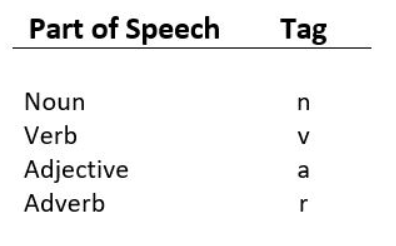

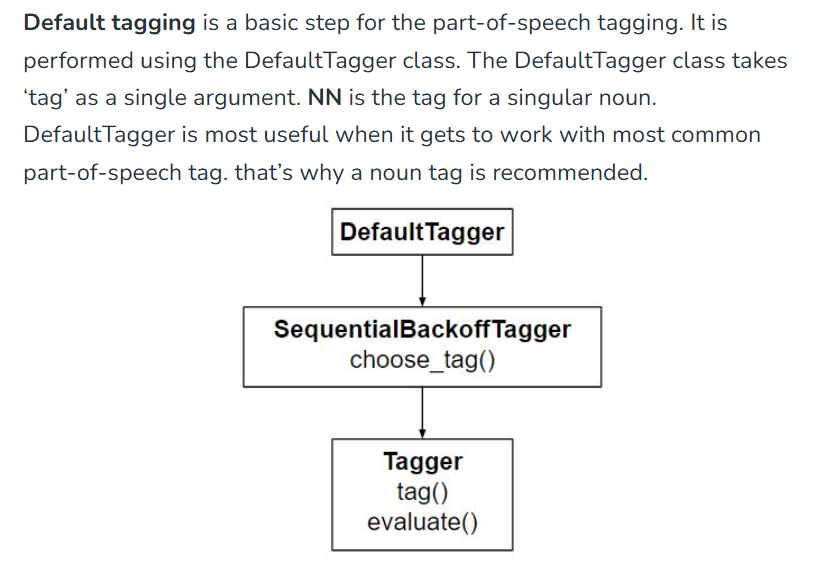

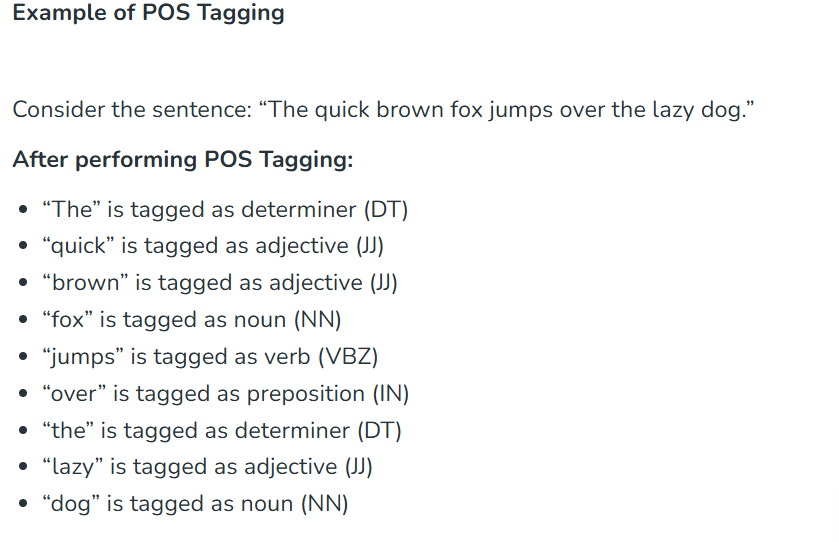

In [98]:
sentence = """"
Machine learning (ML) is a vast  eld populated by algorithms 
that leverage relatively simple math that goes back centuries, math 
one learns in high school or early in college.  
ere’s, of course, ele
mentary algebra. Another extremely important cornerstone of ma
chine learning is calculus, co-invented by no less a polymath than 
Isaac Newton.  
e  
eld also relies heavily on the work of  
omas 
Bayes, the  eighteenth-  century English statistician and minister who 
gave us the eponymous Bayes’s theorem, a key contribution to the 
eld of probability and statistics.  
e work of German mathemati
cian Carl Friedrich Gauss on the Gaussian distribution (and the  bell- 
 shaped curve) also permeates machine learning. """
sentence_tokens = nltk.word_tokenize(sentence)
print(sentence_tokens)

['``', 'Machine', 'learning', '(', 'ML', ')', 'is', 'a', 'vast', 'eld', 'populated', 'by', 'algorithms', 'that', 'leverage', 'relatively', 'simple', 'math', 'that', 'goes', 'back', 'centuries', ',', 'math', 'one', 'learns', 'in', 'high', 'school', 'or', 'early', 'in', 'college', '.', 'ere', '’', 's', ',', 'of', 'course', ',', 'ele', 'mentary', 'algebra', '.', 'Another', 'extremely', 'important', 'cornerstone', 'of', 'ma', 'chine', 'learning', 'is', 'calculus', ',', 'co-invented', 'by', 'no', 'less', 'a', 'polymath', 'than', 'Isaac', 'Newton', '.', 'e', 'eld', 'also', 'relies', 'heavily', 'on', 'the', 'work', 'of', 'omas', 'Bayes', ',', 'the', 'eighteenth-', 'century', 'English', 'statistician', 'and', 'minister', 'who', 'gave', 'us', 'the', 'eponymous', 'Bayes', '’', 's', 'theorem', ',', 'a', 'key', 'contribution', 'to', 'the', 'eld', 'of', 'probability', 'and', 'statistics', '.', 'e', 'work', 'of', 'German', 'mathemati', 'cian', 'Carl', 'Friedrich', 'Gauss', 'on', 'the', 'Gaussian', '

In [99]:
pos_tags = nltk.pos_tag(sentence_tokens)
print("PoS Tags:", pos_tags)

PoS Tags: [('``', '``'), ('Machine', 'NN'), ('learning', 'NN'), ('(', '('), ('ML', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('vast', 'JJ'), ('eld', 'NN'), ('populated', 'VBN'), ('by', 'IN'), ('algorithms', 'NN'), ('that', 'WDT'), ('leverage', 'NN'), ('relatively', 'RB'), ('simple', 'JJ'), ('math', 'NN'), ('that', 'WDT'), ('goes', 'VBZ'), ('back', 'RB'), ('centuries', 'NNS'), (',', ','), ('math', 'VBP'), ('one', 'CD'), ('learns', 'VBZ'), ('in', 'IN'), ('high', 'JJ'), ('school', 'NN'), ('or', 'CC'), ('early', 'JJ'), ('in', 'IN'), ('college', 'NN'), ('.', '.'), ('ere', 'JJ'), ('’', 'JJ'), ('s', 'NN'), (',', ','), ('of', 'IN'), ('course', 'NN'), (',', ','), ('ele', 'JJ'), ('mentary', 'JJ'), ('algebra', 'NN'), ('.', '.'), ('Another', 'DT'), ('extremely', 'RB'), ('important', 'JJ'), ('cornerstone', 'NN'), ('of', 'IN'), ('ma', 'JJ'), ('chine', 'NN'), ('learning', 'NN'), ('is', 'VBZ'), ('calculus', 'JJ'), (',', ','), ('co-invented', 'JJ'), ('by', 'IN'), ('no', 'DT'), ('less', 'JJR'), ('

Named Entity Recognition

Name-entity recognition (NER) is also referred to as entity identification, entity chunking, and entity extraction. NER is the component of information extraction that aims to identify and categorize named entities within unstructured text. NER involves the identification of key information in the text and classification into a set of predefined categories. An entity is the thing that is consistently talked about or refer to in the text, such as person names, organizations, locations, time expressions, quantities, percentages and more predefined categories.


In [89]:
import pandas as pd 
import spacy 
import requests 
from bs4 import BeautifulSoup
nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_rows", 200)

In [90]:
doc = nlp(sentence)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

ML 20 22 ORG
one 133 136 CARDINAL
Isaac Newton 335 347 PERSON
Bayes 402 407 ORG
century 427 434 DATE
English 435 442 LANGUAGE
Bayes 496 501 ORG
German 587 593 NORP
Carl Friedrich Gauss 609 629 PERSON


The output displayed the names of the entities, their start and end positions in the text, and their predicted labels.

Visualize
The displacy.render function from spaCy is used to visualize the named entities in a text. It generates a visual representation with colored highlights indicating the recognized entities and their respective categories.

In [91]:
from spacy import displacy
displacy.render(doc, style="ent")

Constituency Parsing 

Constituency parsing is a natural language processing technique that is used to analyze the grammatical structure of sentences. It is a type of syntactic parsing that aims to identify the constituents, or subparts, of a sentence and the relationships between them. The output of a constituency parser is typically a parse tree, which represents the hierarchical structure of the sentence.

Applications of Constituency Parsing
Constituency parsing is a process of identifying the constituents (noun phrases, verbs, clauses, etc.) in a sentence and grouping them into a tree-like structure that represents the grammatical relationships among them.

The following are some of the applications of constituency parsing:

Natural Language Processing (NLP) – It is used in various NLP tasks such as text summarization, machine translation, question answering, and text classification.
Information Retrieval – It is used to extract information from large corpora and to index it for efficient retrieval.
Text-to-Speech – It helps in generating human-like speech by understanding the grammar and structure of the text.
Sentiment Analysis – It helps in determining the sentiment of a text by identifying positive, negative, or neutral sentiments in the constituents.
Text-based Games and Chatbots – It helps in generating more human-like responses in text-based games and chatbots.
Text Summarization – It is used to summarize large texts by identifying the most important constituents and representing them in a compact form.
Text Classification – It is used to classify text into predefined categories by analyzing the constituent structure and relationships.

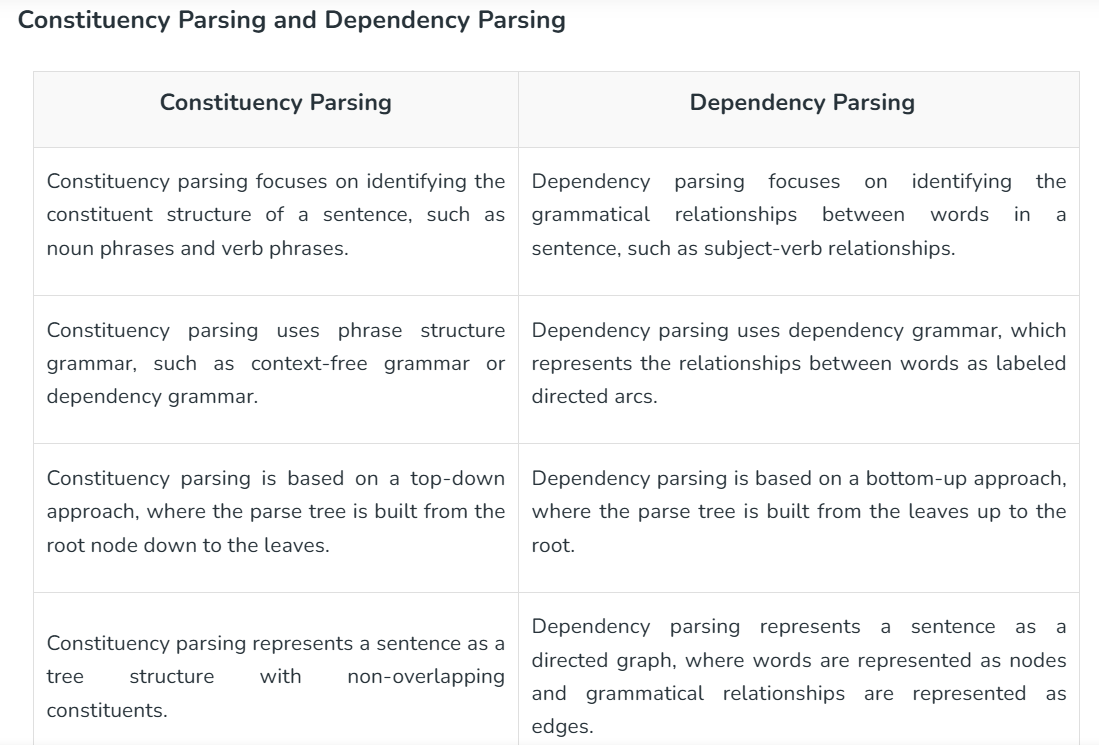
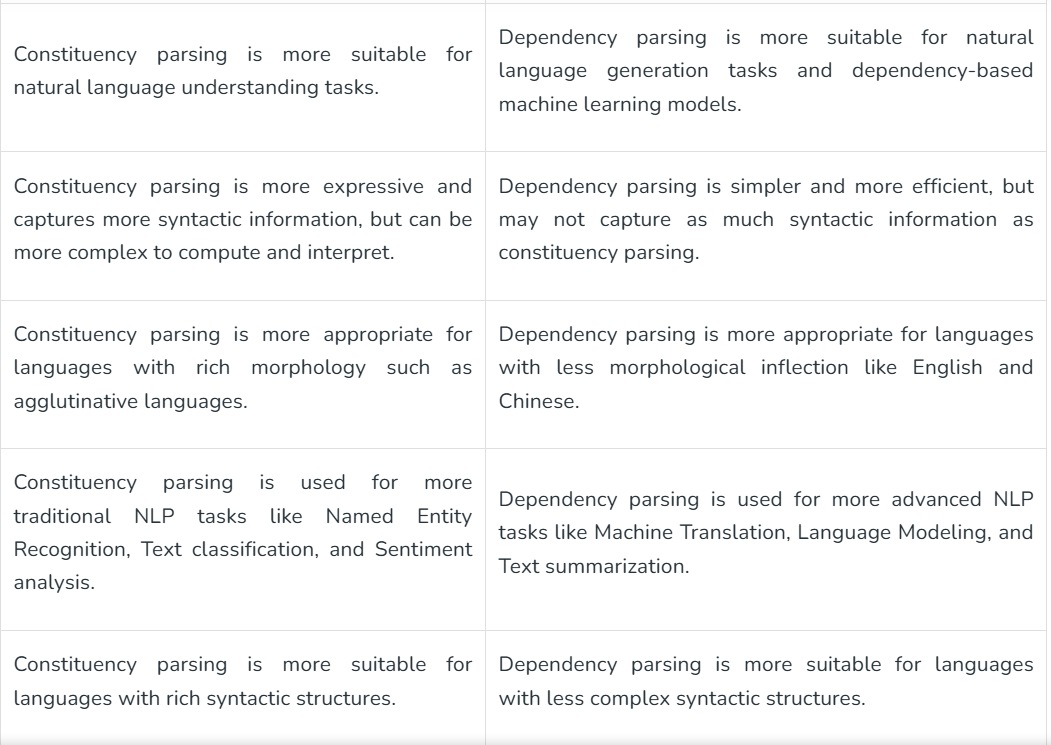

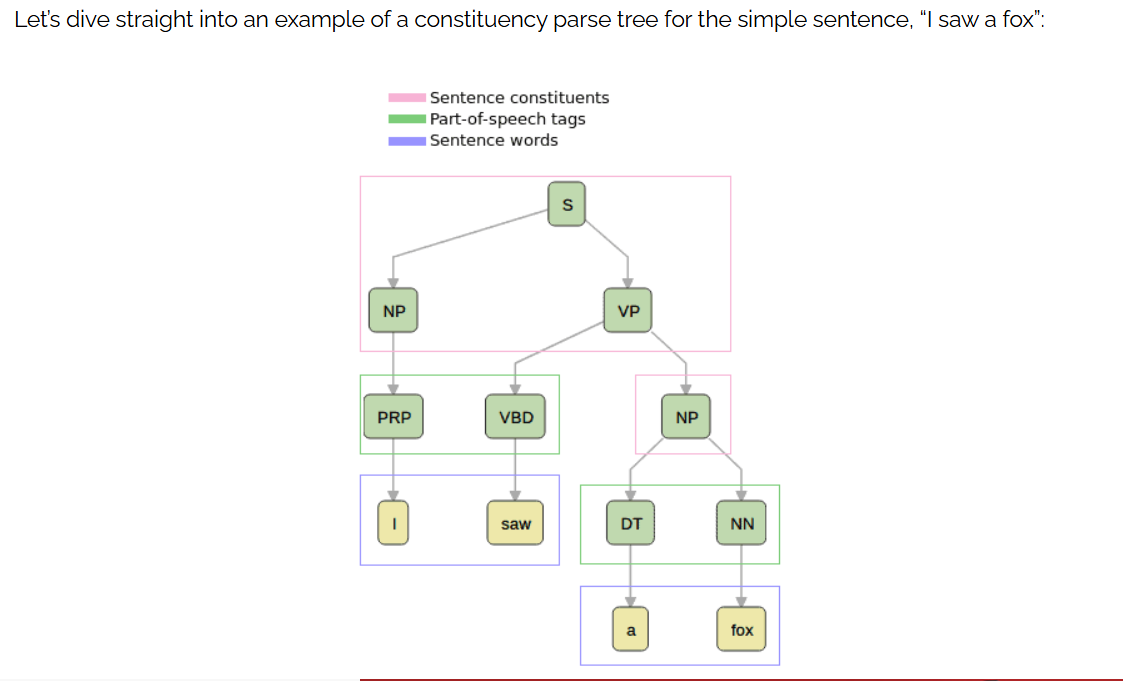

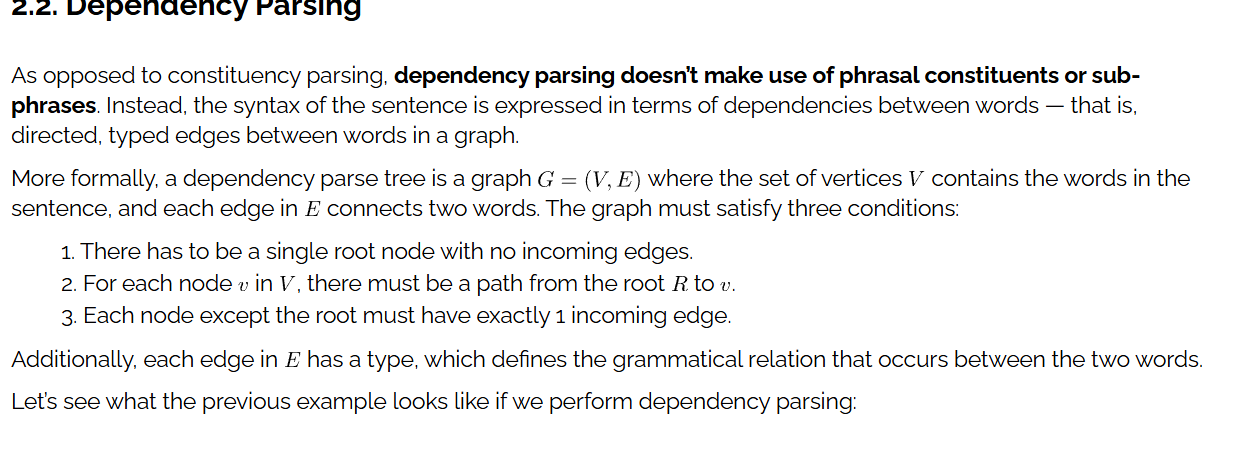

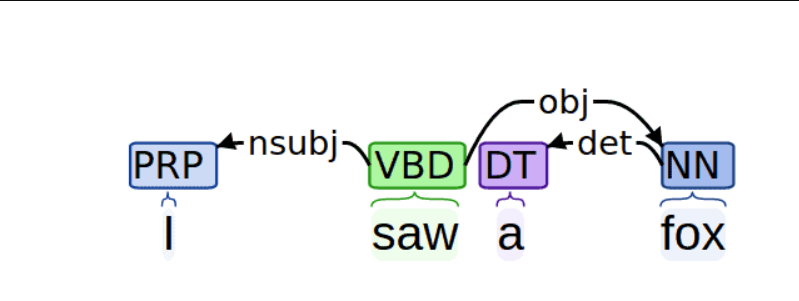

In [111]:
from nltk.chunk import ne_chunk
from nltk.tree import Tree
from nltk.chunk import ne_chunk
def constituency_parsing(sentence):
    print("Constituency Parsing (using nltk tree):")
    words = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)
    tree = ne_chunk(pos_tags)
    tree.draw()

In [101]:
def dependency_parsing(sentence):
    doc = nlp(sentence)  # Uses blank spaCy model, won't provide detailed parsing
    print("Dependency Parsing (Basic Tokenization):")
    for token in doc:
        print(f"{token.text} -> {token.dep_} -> {token.head.text}")



In [100]:
sentence = "The Wonderful Adventures of  Nils"
print(dependency_parsing(sentence))

Dependency Parsing (Basic Tokenization):
The -> det -> Adventures
Wonderful -> amod -> Adventures
Adventures -> ROOT -> Adventures
of -> prep -> Adventures
  -> dep -> of
Nils -> pobj -> of
None


In [114]:
%pip install benepar


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 

In [115]:
import benepar
benepar.download('benepar_en3')


[nltk_data] Downloading package benepar_en3 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping models\benepar_en3.zip.
[nltk_data] Error with downloaded zip file


False

In [113]:
sentence = "The Wonderful Adventures of  Nils"
   
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("benepar", config={"model": "benepar_en3"})

def constituency_parsing(sentence):
    doc = nlp(sentence)
    return list(doc.sents)[0]._.parse_string

ValueError: [E002] Can't find factory for 'benepar' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, en.lemmatizer